# **Distributions**

In this example notebook, I will be exploring, explaining, and providing examples of various types of statistical distribution.

Distributions are a statistical function that shows the possible values of a variable and it's frequency of occurence. It serves up a mathematical description of the data's behavior indicating where most data points are concentrated and how they are spread out.

Distributions can be represented in various ways -> probability density functions for continuous data or probability mass functions for discrete data.

- **Probability Function** -> Used to assign probabilities to different possible outcomes in a data set.

- **Probability Density Function** (PDF) -> Used for continuous variables, does not give exact probability of one values, rather it shows the likelihood of a value falling within a certian range.

- **Cumulative Distribution Function** (CDF) -> Probability that a variable takes a value lass than or equal to a specific point.


For more info see [GeekForGeeks-intro-data-distributions](https://www.geeksforgeeks.org/engineering-mathematics/introduction-of-statistical-data-distributions/)

## Contents

- [Continuous](#Continuous)
- [Discrete](#Discrete)
- [Normal](#Normal)
- [Binomial](#Binomial)
- [Poisson](#Poisson)
- [Exponential](#Exponential)
- [Uniform](#Uniform)
- [T-Distribution](#T-Distribution)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

First, ensure to import **matplotlib** to create example distribution visualizations, **numpy** for dummy data generation, and **norm** from **scipy.stats** to access Probability Density Function(PDF) for computing the bellshaped curve. 

### **Continuous**

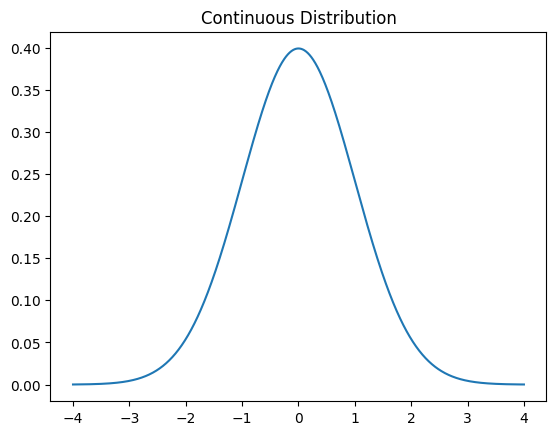

In [2]:
normal_dist_dataset = np.linspace(-4, 4, 1000)
plt.plot(normal_dist_dataset, norm.pdf(normal_dist_dataset, 0, 1))

plt.title("Continuous Distribution")
plt.show()

- A **continuous distribution** is used when the data can take any value within a range, including fractions and decimals. Measures things like height, weight, temperature or time.
- Common continuous distributions included: Normal and Exponential distributions.
- np.linspace(x, y, z) method from numpy is used to generate _**z**_ data points within the range of _**x**_ - _**y**_. THese values are automatically spaced evenly.
- norm.pdf(params) uses Probability Density function, which gives the density (curve height) of how likely values near a point are. For ex) the area under the curve between two arbitrary points _is_ the probability.

### **Discrete**

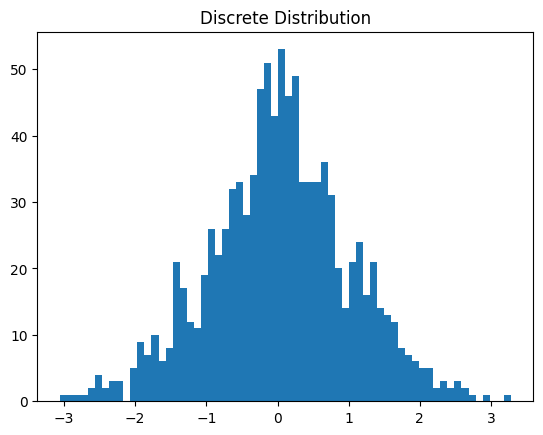

In [3]:
data = np.random.randn(1000)
plt.hist(data, bins=64)
plt.title("Discrete Distribution")
plt.show()

- A **discrete distribution** is used when the data can only take seperate values, whole numbers.
- Common types of discrete distributions are Binomial and Poisson distributions. 

### **Normal**

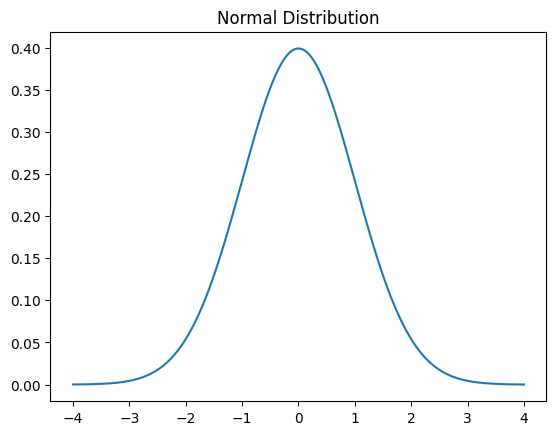

In [4]:
normal_dist_dataset = np.linspace(-4, 4, 500)
plt.plot(normal_dist_dataset, norm.pdf(normal_dist_dataset, 0, 1))

plt.title("Normal Distribution")
plt.show()

- A **normal distribution** is a continuous probability distribution that is symmetric centerd on the mean, where the data closer to the mean has higher frequency than data further from the mean.

### **Binomial**

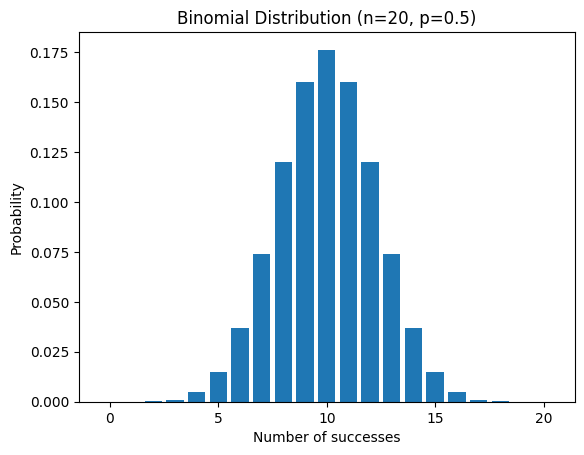

In [5]:
from scipy.stats import binom

n = 20 # number of trials
p = 0.5 #prob of success

# Possible outcomes
x = np.arange(0, n+1)

#Binomial PMF -> Probability Mass Function
pmf = binom.pmf(x, n, p)
        
plt.bar(x, pmf)
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.xlabel("Number of successes")
plt.ylabel("Probability")


plt.show()



- Symmetrically Distributed Binomial Distribution

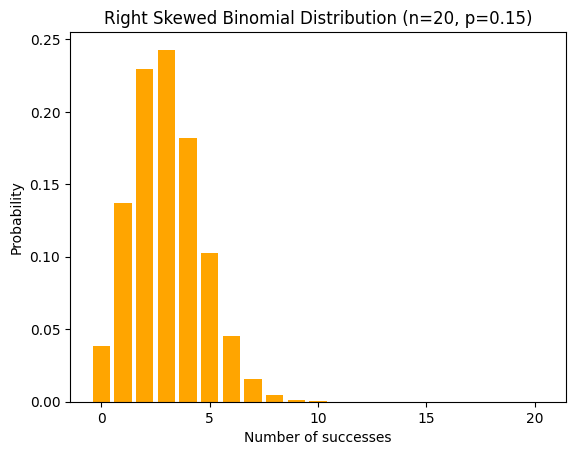

In [6]:
from scipy.stats import binom

n = 20 # number of trials
p = 0.15 #prob of success

# Possible outcomes
x = np.arange(0, n+1)

#Binomial PMF -> Probability Mass Function
pmf = binom.pmf(x, n, p)
        
plt.bar(x, pmf, color='orange')
plt.title(f"Right Skewed Binomial Distribution (n={n}, p={p})")
plt.xlabel("Number of successes")
plt.ylabel("Probability")


plt.show()



- Right Skewed Binomial Distribution
- AKA Positively Skewed Binomial Distribution

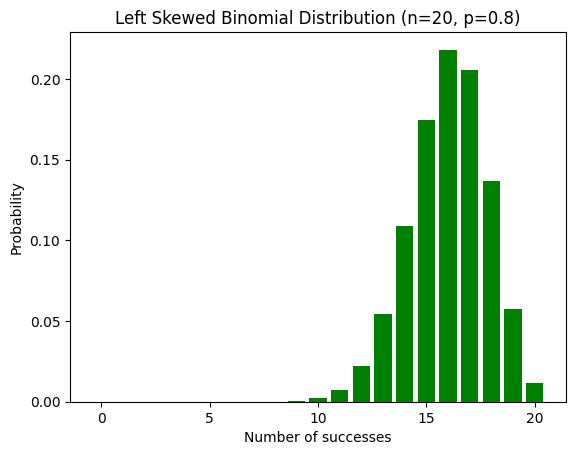

In [7]:
from scipy.stats import binom

n = 20 # number of trials
p = 0.8 #prob of success

# Possible outcomes
x = np.arange(0, n+1)

#Binomial PMF -> Probability Mass Function
pmf = binom.pmf(x, n, p)
        
plt.bar(x, pmf, color='green')
plt.title(f"Left Skewed Binomial Distribution (n={n}, p={p})")
plt.xlabel("Number of successes")
plt.ylabel("Probability")


plt.show()



- Left Skewed Binomial Distribution
- AKA Negatively Skewed Binomial Distribution

- Binomials are useful in circumstances that involve two outcomes and _**n**_ amount of trials, where _**p**_ is the probability of success on any given trial run.
- As the _**n**_ grows, the binomial becomes inherently more symmetrical due to the Central Limit Theorem.
- As the _**p**_ value is shifted away from 0.5 towards 0, the distribution becomes skewed **Right or Negatively**.
- As the _**p**_ value is shifted away from 0.5 towards 1, the distribution becomes skewed **Left or Positively**.

### **Poisson**

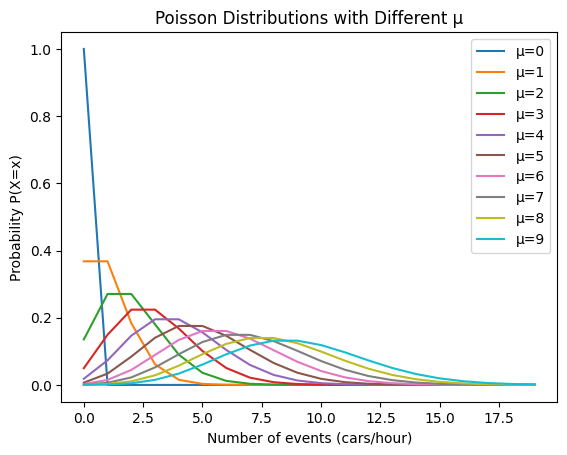

In [8]:
from scipy.stats import poisson

mu_array = range(10)

# create numpy array -> x-axis w/ step size 1.
x = np.arange(0, 20, 1)

# poisson distribution data -> y-axis. Iterate through each dist & plot it.
for mu in mu_array:
    y = poisson.pmf(x, mu=mu, loc=0)
    plt.plot(x,y, label=f"μ={mu}")

plt.xlabel("Number of events (cars/hour)")
plt.ylabel("Probability P(X=x)")
plt.title("Poisson Distributions with Different μ")
plt.legend()
plt.show()

- Poisson distribution is used to model the likelihood of events happening at a certain rate within a fixed time or space, under the assumptions of independence and constant occurrence.
- For example think about how many cars pass through a toll booth in one hour, the **x axis** represents the **number of cars** that pass through in one hour, while the **y axis** represents the **probability of exactly that many cars passing through** in one hour.
- In the above visualization example, each line is a seperate Poisson distribution with differing mu values. Each mu value here may represent different average traffic intensities.

    μ=2 → a quiet rural road (avg. 2 cars/hour).

    μ=9 → a busier road (avg. 9 cars/hour).

### **Exponential**

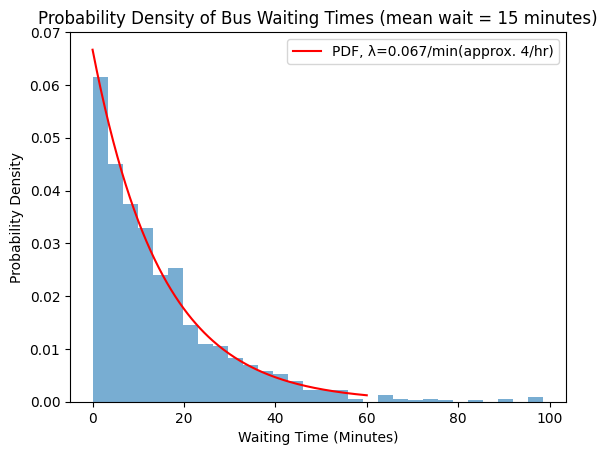

In [22]:
mean_wait = 15 # minutes
lam = 1 / mean_wait  # λ = 0.0667 per minute -> approx 4/hr

x = np.linspace(0, 60, 200)  # From 0->60 (minutes), generate 200 points for the smooth curve.
pdf = lam * np.exp(-lam * x)  # Probability Density Function

plt.plot(x, pdf, 'r-', label=f"PDF, λ={lam:.3f}/min(approx. 4/hr)") # 'r-' solid red line
plt.hist(np.random.exponential(mean_wait, 1000), bins=30, density=True, alpha=0.6)


plt.title("Probability Density of Bus Waiting Times (mean wait = 15 minutes)")
plt.xlabel("Waiting Time (Minutes)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


- Closely related to the **Poisson distribution** but instead of counting how many events occur in a fixed time window., **Exponential models how long you wait between events in that same process**.
  
- Example (bus stop): If buses arrive with an average waiting time of 15 minutes, the actual wait until the next bus is random, but it follows an exponential distribution centered around 15. Short waits are more likely than long waits, but long waits are still possible.

- One of the most common probability distributions used in stats and data science.

- The **Probability Density Function (PDF)** is the smooth curve of the exponential distribution.

  - The curve’s **height** shows how **densely probability** is packed around each wait time.

  - The actual probability of a wait is the area under the curve over a range (e.g., 0–10 minutes = probability the bus arrives within 10 minutes).

### **Uniform**

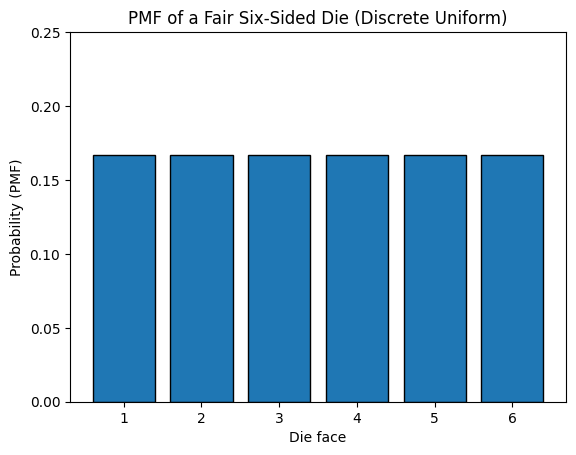

In [38]:
from scipy.stats import randint

# Discrete uniform over {1,...,6}
rv = randint(low=1, high=7)  # support is [1, 7) → {1,2,3,4,5,6}
x = np.arange(1, 7)
pmf = rv.pmf(x)  



plt.bar(x, pmf, width=0.8, edgecolor='k')
plt.xticks(x)
plt.xlabel("Die face")
plt.ylabel("Probability (PMF)")
plt.title("PMF of a Fair Six-Sided Die (Discrete Uniform)")
plt.ylim(0, 0.25)
plt.show()


- **Uniform distribution** outcomes have an equal chance of occuring. For example, rolling a fair six sided die, each number has an equal probability of being rolled.
- **Probability Mass Funciton (PMF)** gives the probability that the variable takes each exact value for **discrete random variables**
- **Support** of a distribution in probability is the set of valyues a random variable can take, that is with none 0 probability.
- **RV or random variable object** provides a frozen distribution object with possible values, can be used with methods pmf/cdf/rvs.
- _**X**_ represents the evaluation points -> “Which points in the support do I want to actually evaluate/plot?”

### **T-Distribution**

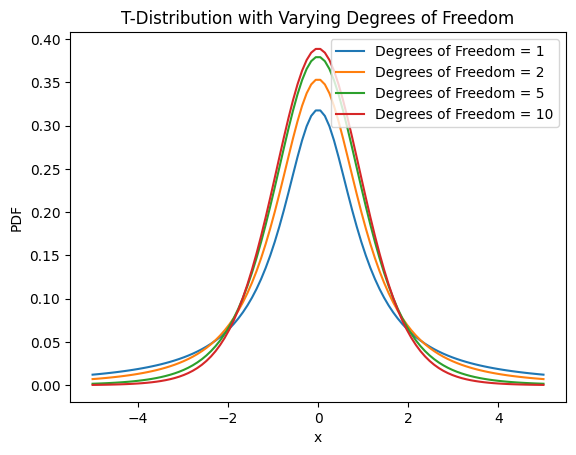

In [43]:
from scipy.stats import t

x = np.linspace(-5, 5, 100)
degrees_of_freedom = [1, 2, 5, 10]  # Varying degrees of freedom

# Plotting T-distribution curves for different degrees of freedom
for df in degrees_of_freedom:
    y = t.pdf(x, df)  # Using default location and scale parameters (0 and 1)
    plt.plot(x, y, label=f"Degrees of Freedom = {df}")

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('T-Distribution with Varying Degrees of Freedom')
plt.legend()
plt.show()

# SOURCE: GeekForGeeks ->
# https://www.geeksforgeeks.org/python/python-students-t-distribution-in-statistics/

- **T-Distribution** is like a normal distribution with heavier tails. Has more variability and is useful with small sample sizes.
- The distribution is characterized by it's **degrees of freedom (df)** -> determining the shape of the t-distribution.
- When researchers don’t know the population's standard deviation and have limited data they often use this distribution to make estimates about means.
- Use t-distribution when **sample is <= 30**, the population **std deviation is unknown**, and the population distribution **must be unimodal (a single mode) and skewed**.